# Amazon Product Review EDA

The purpose of this notebook is to do some exploration of the Amazon product review data that was cleaned in a prior analysis

In [25]:
#First import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
#First load the data

rev = pd.read_csv('Data/AmazonDataCleaned1500k.csv', index_col=False)

In [27]:
#Lets take a look at the data

rev.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking
0,5.0,True,"05 27, 2016",A1RCEZ4VG7W6Q4,B0000CFN85,Mary Payne Kinnamon,Quality thick paper and worked wonders for my ...,Five Stars,1464307200,"['Home & Kitchen', 'Kitchen & Dining', 'Bakewa...","Wilton 415-2505 White Standard 75 Baking Cups,...",Wilton,"['>#9,714 in Kitchen & Dining (See Top 100 in ...",Amazon Home,3.43,"[""9,714 in Kitchen & Dining (See Top 100 in Ki...",B0000CFN85,29 in Kitchen & Dining > Bakeware > Baking Too...,29.0
1,5.0,True,"08 15, 2014",A3LTJ22VDCATD1,B001BN8Z2K,Mom of 4,Covers more area in a shorter amount of time. ...,Large head cuts down your work time - twists l...,1408060800,"['Home & Kitchen', 'Vacuums & Floor Care', 'Va...",Miele SBB 400-3 Parquet Twister XL Smooth Floo...,Miele,"['>#47,359 in Home & Kitchen (See Top 100 in H...",Amazon Home,57.85,"[""47,359 in Home & Kitchen (See Top 100 in Hom...",B001BN8Z2K,38 in Home & Kitchen > Vacuums & Floor Care > ...,38.0
2,5.0,True,"12 30, 2016",A9OHV8NJ03WVH,B0026SPXRY,Susana Pachas,It's great! Easy to assemble and sturdy it's ...,It's great! Easy to assemble and sturdy it's n...,1483056000,"['Home & Kitchen', 'Furniture', 'Kitchen & Din...",Whitmor Supreme Sink Shelf - Multiuse Organize...,Whitmor,"['>#2,026 in Home & Kitchen (See Top 100 in Ho...",Amazon Home,28.93,"['2,026 in Home & Kitchen (See Top 100 in Home...",B0026SPXRY,1 in Home & Kitchen > Furniture > Kitchen & Di...,1.0
3,4.0,True,"09 28, 2015",AT3P07T5RVNTQ,B00ESAR0JW,Hstar13,We haven't had a real oven for over a year now...,"This cooks most things pretty well, but you ha...",1443398400,"['Home & Kitchen', 'Kitchen & Dining', 'Small ...",Hamilton Beach 31103A Countertop Oven with Con...,Hamilton Beach,"['>#6,672 in Kitchen & Dining (See Top 100 in ...",Amazon Home,7.05,"[""6,672 in Kitchen & Dining (See Top 100 in Ki...",B0059KY05M,73 in Kitchen & Dining > Small Appliances > Ov...,73.0
4,3.0,True,"06 23, 2017",A4I78M7IQPW12,B0074V10JS,Pamela,Nice bedskirt but won't work with a bed that h...,Nice bedskirt,1498176000,"['Home & Kitchen', 'Bedding', 'Bed Skirts']",Hdetails Bed Skirts/Elastic Ruffles - Bedding ...,Hdetails,"['>#76,184 in Home & Kitchen (See Top 100 in H...",Amazon Home,12.99,"[""76,184 in Home & Kitchen (See Top 100 in Hom...",B0074V10JS,95 in Home & Kitchen > Bedding > Bed Skirts'],95.0


Text(0.5, 1.0, 'Sales Ranking by Overall Rating')

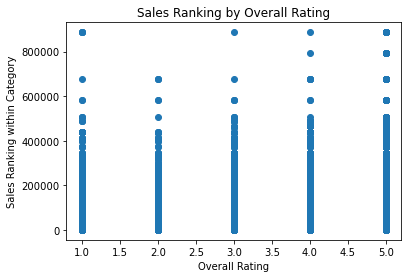

In [28]:
plt.scatter(rev.overall, rev.Ranking)
plt.xlabel('Overall Rating')
plt.ylabel('Sales Ranking within Category')
plt.title('Sales Ranking by Overall Rating')

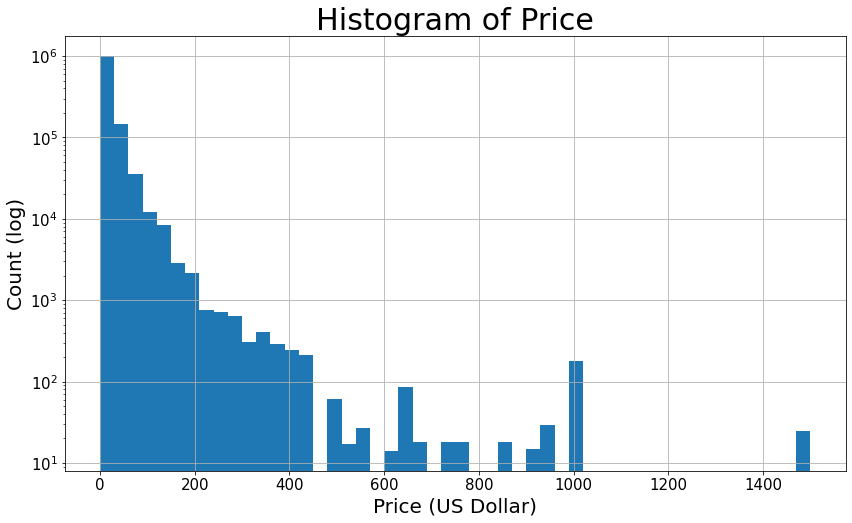

In [29]:
# Make some histograms
fig = plt.figure(figsize = (14, 8))
rev.price.hist(bins = 50)
_ = plt.yscale('log')
_ = plt.xlabel('Price (US Dollar)', fontsize = 20)
_ = plt.ylabel('Count (log)', fontsize = 20)
_ = plt.title('Histogram of Price', fontsize  =30)
_ = plt.xticks(fontsize = 15)
_ = plt.yticks(fontsize = 15)
plt.savefig('PriceHist.pdf', format = 'pdf')

<AxesSubplot:>

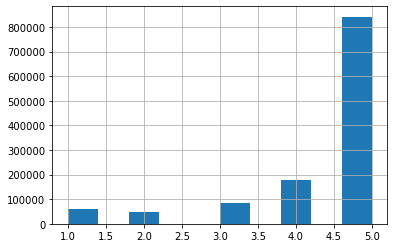

In [30]:
rev.overall.hist()

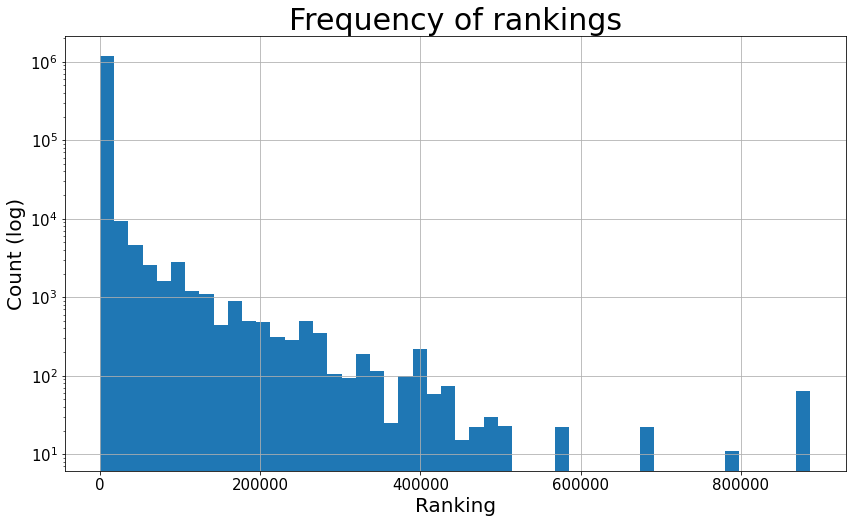

In [31]:
fig = plt.figure(figsize = (14, 8))
rev.Ranking.hist(bins = 50)
plt.yscale('log')
plt.xlabel('Ranking', fontsize = 20)
plt.ylabel('Count (log)', fontsize = 20)
plt.title('Frequency of rankings', fontsize = 30)
_ = plt.xticks(fontsize = 15)
_ = plt.yticks(fontsize = 15)
plt.savefig('RankHist.pdf', format = 'pdf')

In [32]:
#It looks like there may be an erroneous value in price, but we'll need to take a look

priceErrors = rev[rev['price'] == rev['price'].max()]
priceErrors

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking
39113,3.0,True,"07 19, 2017",A18NGGBOBOON3R,B006ZNCM3E,mark celano,good products,Three Stars,1500422400,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
88611,5.0,True,"06 3, 2014",A31ZO2G7KA11AR,B006ZNCM3E,Poppies,"*have had this set 4 years now, they still loo...","Great pans, Wife was pleased",1401753600,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
122646,5.0,True,"03 1, 2018",AELL6EXXQQQXT,B006ZNCM3E,Brothers Jungly &amp;amp; Moghly,Best pans for induction cooktop,Five Stars,1519862400,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
225883,4.0,True,"04 24, 2017",A27486QUQTDCTG,B006ZNCM3E,mhaia,burnt spot in first use and won't came off,Four Stars,1492992000,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
262030,4.0,True,"02 8, 2016",A3UUR3CHSZFAWY,B006ZNCM3E,Chuong Ta,My wife likes these cooking ware. It's a bit ...,Foods taste good.,1454889600,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
374732,5.0,True,"03 11, 2018",A1C558KI7SYIA,B006ZNCM3E,scottierazor,Im happy with this set. Bought some sizes not ...,Hope this is the last set we need,1520726400,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
403716,4.0,False,"07 27, 2014",A6B5BH625L79M,B006ZNCM3E,jj,Sharing my comparison testing of fully clad co...,AllClad and USA Pan comparisons,1406419200,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
428143,5.0,True,"12 8, 2016",A2PGPLJ2T872V6,B006ZNCM3E,Sherry Stone,"Love, love, love these pots and pans. These ar...","Love, love",1481155200,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Home,1499.95,"[""17,503 in Kitchen & Dining (See Top 100 in K...",B006ZNCM3E,117 in Kitchen & Dining > Cookware > Cookware ...,117.0
428234,5.0,True,"09 13, 2016",ACN8AB5BN780R,B006ZNCM3E,dlf,It met all my expectations.,Five Stars,1473724800,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",All-Clad BD005714 D5 Brushed 18/10 Stainless S...,All-Clad,"['>#17,503 in Kitchen & Dining (See Top 100 in...",Amazon Hom

In [33]:
#I sure hope these are errors, I doubt you'd move many units if your alarm clock or hot pads were $1000... 
# As a first step, I'm going to check all of the products over $300 against the rest of the dataset to see if there is a more reasonable
# price value that we can use to impute these data. If there are none, we'll have to drop these rows. 
possiblePriceErrors = rev[rev['price'] >= 300]
#Insert a column for possible imputable vals
possiblePriceErrors.insert(possiblePriceErrors.columns.get_loc('Ranking')+1, 'imputedVal', np.nan)
#For each row, check the full data set for the average value of the product cost.
for item in range(len(possiblePriceErrors)):
    #If the item is in the full dataset, calculate the average price and determine if it is different from the erroneous values
    if possiblePriceErrors['asin'].iloc[item] in rev['asin'].unique():
        if rev[rev['asin'] == possiblePriceErrors['asin'].iloc[item]]['price'].mean() != possiblePriceErrors['price'].iloc[item]:
            possiblePriceErrors['imputedVal'].iloc[item] = rev[rev['asin'] == possiblePriceErrors['asin'].iloc[item]]['price'].mean()
        else:
            possiblePriceErrors['imputedVal'] = False
    else:
        possiblePriceErrors['imputedVal'] = False
        
possiblePriceErrors['imputedVal']

1233        False
1335        False
1586        False
1677        False
2382        False
            ...  
1214491     False
1215209    502.06
1216190    399.99
1216853    499.95
1217149    499.95
Name: imputedVal, Length: 1915, dtype: object

In [34]:
#It appears these were the only instances of the items in the dataset, so we need to inspect each item to determine if the 
#price is reasonable or not

possiblePriceErrors


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking,imputedVal
1233,4.0,True,"08 5, 2016",A1KHL5P6R3U4RK,B000H12TII,limi,Nice set.,Four Stars,1470355200,"['Home & Kitchen', 'Kitchen & Dining', 'Cutler...","Victorinox 14-Piece Gourmet Cutlery Set, Fibro...",Victorinox,"['>#12,990 in Kitchen & Dining (See Top 100 in...",Amazon Home,539.83,"[""12,990 in Kitchen & Dining (See Top 100 in K...",B000H12TII,53 in Kitchen & Dining > Kitchen Knives & Cutl...,53.0,False
1335,5.0,True,"06 11, 2017",A3VLR6J5IYRTJF,B01B4XUPTC,Dizzieanne,I purchased these for my daughter for a beach ...,Very nice!,1497139200,"['Home & Kitchen', 'Heating, Cooling & Air Qua...","Frigidaire 12,000 BTU 115V Window-Mounted Comp...",Frigidaire,"['>#306,782 in Home & Kitchen (See Top 100 in ...",Amazon Home,314.25,"[""306,782 in Home & Kitchen (See Top 100 in Ho...",B00VV2JO4E,"42 in Home & Kitchen > Heating, Cooling & Air ...",42.0,False
1586,4.0,True,"01 2, 2018",AMW8C6ANPSYQ1,B01CS3J4LW,M Jafarbay,"It works as designed, but it's not the most ef...",It works to cool down our place,1514851200,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Honeywell Contempo Series Portable Air Conditi...,Honeywell,"['>#276,570 in Home & Kitchen (See Top 100 in ...",Amazon Home,329.83,"[""276,570 in Home & Kitchen (See Top 100 in Ho...",B01CS3J4LW,"44 in Home & Kitchen > Heating, Cooling & Air ...",44.0,False
1677,5.0,True,"12 16, 2012",A21GSPSCF1B7H2,B00440CRJ4,Jon Christopher Jones,"I did a lot of looking, online and in stores, ...",Excellent service and great product,1355616000,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Southern Enterprises Cartwright Convertible El...,Southern Enterprises,"['>#199,460 in Home & Kitchen (See top 100)', ...",Amazon Home,502.06,"[""199,460 in Home & Kitchen (See top 100)', '""...",B00440CRJ4,"120 in Home & Kitchen > Heating, Cooling & Air...",120.0,False
2382,5.0,True,"02 14, 2014",ATOYXYQVFGNEJ,B00440CRJ4,Robert Larson,"Interesting to put together, but not too toug...",Very good!,1392336000,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Southern Enterprises Cartwright Convertible El...,Southern Enterprises,"['>#199,460 in Home & Kitchen (See top 100)', ...",Amazon Home,502.06,"[""199,460 in Home & Kitchen (See top 100)', '""...",B00440CRJ4,"120 in Home & Kitchen > Heating, Cooling & Air...",120.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214491,4.0,False,"06 29, 2017",ANEEEFP4BL7ZX,B001TO7108,Lynda Lippin,There is so much to like about this pan! It is...,"Heavy duty, nonstick stainless steel pan",1498694400,"['Home & Kitchen', 'Kitchen & Dining', 'Cookwa...",USA Pan 1550CW-1 5-Ply Stainless Steel 8 Piece...,USA Pan,"['>#30,820 in Kitchen & Dining (See Top 100 in...",Amazon Home,363.06,"[""30,820 in Kitchen & Dining (See Top 100 in K...",B001TO7108,512 in Kitchen & Dining > Cookware > All Pans'],512.0,False
1215209,5.0,True,"07 29, 2016",A1N1AW0RJWOR56,B00440CRJ4,John,So when you order this it comes in two boxes. ...,Perfect. Absolutely Perfect!,1469750400,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Southern Enterprises Cartwright Convertible El...,Southern Enterprises,"['>#199,460 in Home & Kitchen (See top 100)', ...",Amazon Home,502.06,"[""199,460 in Home & Kitchen (See top 100)', '""...",B00440CRJ4,"120 in Home & Kitchen > Heating, Cooling & Air...",120.0,502.06
1216190,5.0,True,"04 20, 2018",A1Z0DOUZ8VU58Y,B0001J05IC,gary,Works great as a humidifier and air washer so far,Five Stars,1524182400,"['Home & Kitchen', 'Heating, Cooling & Air Qua...",Venta LW45 Airwasher 2-in-1 Humidifier and Air...,Venta,"['>#15,036 in Home & Kitchen (See Top 100 in H...",Amazon Home,399.99,"[""15,036 in Home & Kitchen (See Top 100 in Hom...",B0001J05IC,"92 in Home & Kitchen > Heating, Cooling & Air ...",92.0,399.99
1216853,2.0,True,"12 5, 2015",A11BDIAEDRILO7,B00092ZVXA,MamaMia80

In [35]:
#Many of these prices seem reasonable for the items. There are a few mattresses, some Dyson vaccums and some high end cookware.
#The only outliers appear to be the items priced at $999.99, so we'll drop those. 
priceErrors = rev[rev['price'] == 999.99]
rev.drop(priceErrors.index, axis=0, inplace = True)
#There also appear to be several items with a pric eof zero. These need to be dropped.
zeros = rev[rev['price'] == 0]
rev.drop(zeros.index, axis=0, inplace=True)


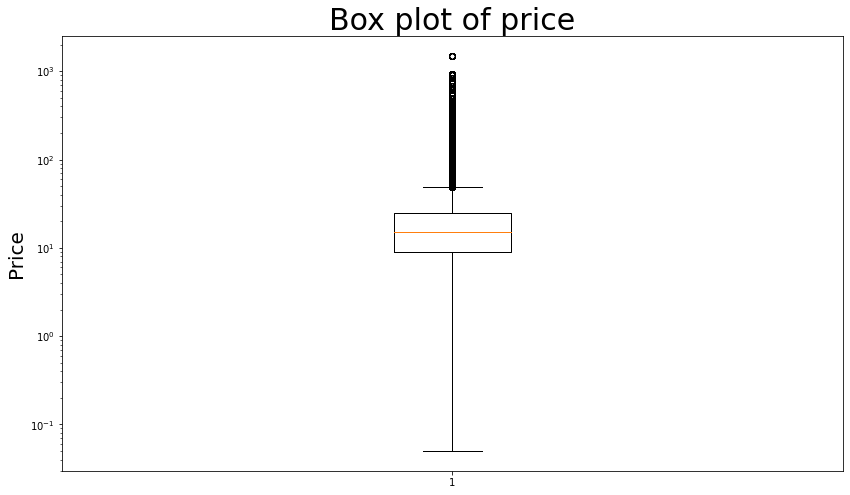

In [36]:
#Lets investigate possible outliers in the price data.
fig = plt.figure(figsize = (14, 8))
#sns.boxplot(y='price', data = rev)
plt.boxplot(rev.price)
plt.yscale('log')
plt.ylabel('Price', fontsize = 20)
plt.title('Box plot of price', fontsize = 30)
plt.savefig('priceBoxPlot.pdf', format = 'pdf')
# There could be some outliers there...

In [37]:
#Lots see how many fall outside 3*IQRs
summary = rev['price'].describe()
qtr1 = summary['25%']
qtr3 = summary['75%']
IQR = qtr3-qtr1
outliers = rev[rev['price'] > 4*IQR]
outliers.shape

(59850, 19)

In [38]:
#I'll try dropping these outlier points
rev = rev.drop(outliers.index, axis = 0)

In [39]:
#It also appears there are some industrial items included in the data set, since I'm only interested in individual purchases, I
#will drop all industrial products. 
industrial = rev[rev['price'] > 900]
rev.drop(industrial.index, axis = 0, inplace = True)


Text(0, 0.5, 'Frequency (log)')

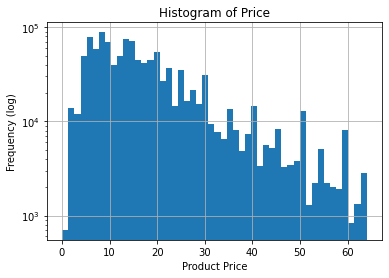

In [40]:
#now we'll take a look at the data again. 
rev.price.hist(bins = 50)
plt.yscale('log')
plt.title('Histogram of Price')
plt.xlabel('Product Price')
plt.ylabel('Frequency (log)')


In [41]:
#Now I'll take a look at the items with the worst rankings to see if there are any outliers there.

largestRank = rev.nlargest(15, 'Ranking').reset_index()
largestRank

,index,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking
0,2752,4.0,True,"11 21, 2015",A29MAH14VCQWZF,B008PATCTW,M.A. Talley,It's a little hard to insert the battery.,Four Stars,1448064000,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
1,16817,5.0,True,"05 18, 2015",A24FS9EKQDRGOD,B008PATCTW,Dante,I just received it today and hung it in our pa...,Pretty impressive clock.,1431907200,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
2,74933,5.0,True,"11 21, 2015",A3DAG3R3OMX2AN,B008PATCTW,OJL,"Great quality, works well outdoors, easy to se...",Great clock,1448064000,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
3,298106,5.0,True,"11 24, 2014",A31PW1OSQLQNTN,B008PATCTW,Anthony,"very nice classic clock, high quality and no c...",Five Stars,1416787200,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
4,513833,5.0,True,"12 13, 2016",ADX6UKMDPHRYV,B008PATCTW,Remington,We bought 2 of these Seiko Outdoor Clocks for ...,Seiko Classic Outdoor Clock,1481587200,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
5,546534,5.0,True,"03 11, 2017",A2CAM9VF1IPS8I,B008PATCTW,lazyshopper,"Love it. Easy to read, good quality. I've only...",Great purchase.,1489190400,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
6,608714,5.0,True,"08 10, 2014",A2ZLYDFPNB1DT4,B008PATCTW,Kathy Saine,This is a cool lock. It's nice and big and eas...,This is a cool lock. It's nice and big and eas...,1407628800,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
7,646430,5.0,True,"07 15, 2015",A2S2RH436FM3LI,B008PATCTW,Edythe,"This clock is simple, functional and elegant. ...",LOVE THIS CLOCK!,1436918400,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BLH Classic Outdoor Clock,Seiko,"792,722 in Clothing, Shoes & Jewelry (","<img src=""https://images-na.ssl-images-amazon....",55.55,"['792,722 in Clothing, Shoes & Jewelry (']",B008PATCTW,"792,722 in Clothing, Shoes & Jewelry (",792722.0
8,761496,5.0,True,"09 28, 2013",A3HJ2CRLCF3IZA,B008PATCTW,Kathryn O&#039;Brien,Hung it outside second story window in back of...,Great outdoor clock,1380326400,"['Home & Kitchen', 'Home Dcor', 'Clocks', 'Ala...",Seiko QXA548BL

Text(0, 0.5, 'Frequency (log)')

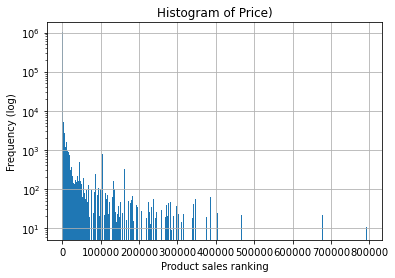

In [42]:
#Now lets take a look at the highest ranking in more detail
rev.Ranking.hist(bins = 1000)
plt.yscale('log')
plt.title('Histogram of Price)')
plt.xlabel('Product sales ranking')
plt.ylabel('Frequency (log)')


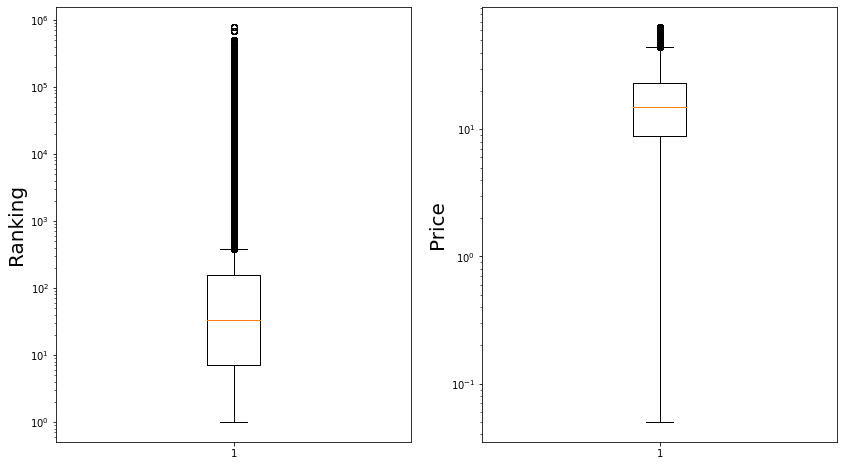

In [43]:
#Lets take a look at the boxplot of ranking.
fig = plt.figure(figsize = (14, 8))
plt.subplot(1, 2, 1)
plt.boxplot(rev.Ranking)
plt.yscale('log')
#plt.title('Box Plot for sales ranking')
plt.ylabel('Ranking', fontsize = 20)
#plt.title('Box plot of Ranking', fontsize = 30)
#plt.savefig('RankingBoxPlot.pdf', format = 'pdf')
plt.subplot(1, 2, 2)
plt.boxplot(rev.price)
plt.yscale('log')
plt.ylabel('Price', fontsize = 20)
#plt.title('Box plot of price', fontsize = 30)
plt.savefig('priceRankBoxPlot.png', format = 'png')

In [44]:
# It looks like there are some outliers in there... Lets see how many fall outside of three IQRs.
summary = rev['Ranking'].describe()
qtr1 = summary['25%']
qtr3 = summary['75%']
IQR = qtr3-qtr1
possibleOutliers = rev[rev['Ranking']  > 4*IQR]
possibleOutliers.shape

(135629, 19)

In [45]:
#These are a lot of data points, but it does seem to make sense to drop the outliers I'll continue with a new copy of the df
df = rev.drop(possibleOutliers.index, axis = 0)

In [46]:
#An important note is that the ranking as it appears is actually the inverse of what we would think meaning that a lower 
#ranking is better, so we'll invert the ranking
maxRank = max(df['Ranking'])
df['salesRanking'] = df['Ranking'].apply(lambda x: maxRank - x)


In [47]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking,salesRanking
0,5.0,True,"05 27, 2016",A1RCEZ4VG7W6Q4,B0000CFN85,Mary Payne Kinnamon,Quality thick paper and worked wonders for my ...,Five Stars,1464307200,"['Home & Kitchen', 'Kitchen & Dining', 'Bakewa...","Wilton 415-2505 White Standard 75 Baking Cups,...",Wilton,"['>#9,714 in Kitchen & Dining (See Top 100 in ...",Amazon Home,3.43,"[""9,714 in Kitchen & Dining (See Top 100 in Ki...",B0000CFN85,29 in Kitchen & Dining > Bakeware > Baking Too...,29.0,567.0
1,5.0,True,"08 15, 2014",A3LTJ22VDCATD1,B001BN8Z2K,Mom of 4,Covers more area in a shorter amount of time. ...,Large head cuts down your work time - twists l...,1408060800,"['Home & Kitchen', 'Vacuums & Floor Care', 'Va...",Miele SBB 400-3 Parquet Twister XL Smooth Floo...,Miele,"['>#47,359 in Home & Kitchen (See Top 100 in H...",Amazon Home,57.85,"[""47,359 in Home & Kitchen (See Top 100 in Hom...",B001BN8Z2K,38 in Home & Kitchen > Vacuums & Floor Care > ...,38.0,558.0
2,5.0,True,"12 30, 2016",A9OHV8NJ03WVH,B0026SPXRY,Susana Pachas,It's great! Easy to assemble and sturdy it's ...,It's great! Easy to assemble and sturdy it's n...,1483056000,"['Home & Kitchen', 'Furniture', 'Kitchen & Din...",Whitmor Supreme Sink Shelf - Multiuse Organize...,Whitmor,"['>#2,026 in Home & Kitchen (See Top 100 in Ho...",Amazon Home,28.93,"['2,026 in Home & Kitchen (See Top 100 in Home...",B0026SPXRY,1 in Home & Kitchen > Furniture > Kitchen & Di...,1.0,595.0
3,4.0,True,"09 28, 2015",AT3P07T5RVNTQ,B00ESAR0JW,Hstar13,We haven't had a real oven for over a year now...,"This cooks most things pretty well, but you ha...",1443398400,"['Home & Kitchen', 'Kitchen & Dining', 'Small ...",Hamilton Beach 31103A Countertop Oven with Con...,Hamilton Beach,"['>#6,672 in Kitchen & Dining (See Top 100 in ...",Amazon Home,7.05,"[""6,672 in Kitchen & Dining (See Top 100 in Ki...",B0059KY05M,73 in Kitchen & Dining > Small Appliances > Ov...,73.0,523.0
4,3.0,True,"06 23, 2017",A4I78M7IQPW12,B0074V10JS,Pamela,Nice bedskirt but won't work with a bed that h...,Nice bedskirt,1498176000,"['Home & Kitchen', 'Bedding', 'Bed Skirts']",Hdetails Bed Skirts/Elastic Ruffles - Bedding ...,Hdetails,"['>#76,184 in Home & Kitchen (See Top 100 in H...",Amazon Home,12.99,"[""76,184 in Home & Kitchen (See Top 100 in Hom...",B0074V10JS,95 in Home & Kitchen > Bedding > Bed Skirts'],95.0,501.0


Text(0.5, 1.0, 'Box Plot of Sales Ranking')

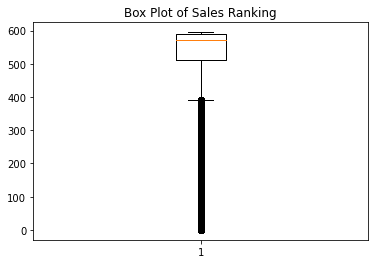

In [48]:
plt.boxplot(df['salesRanking'])
plt.title('Box Plot of Sales Ranking')

Text(0.5, 1.0, 'Sales Ranking vs. Overall Rating')

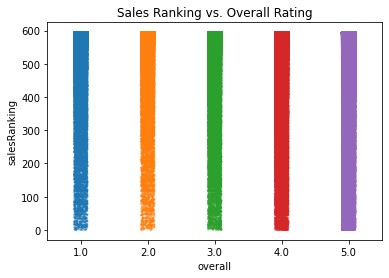

In [49]:
#Now lets take a look at ranking vs. the numeric variables

sns.stripplot(x = 'overall', y = 'salesRanking', data = df, size = 2, alpha = 0.5)
plt.title('Sales Ranking vs. Overall Rating')

Text(0.5, 1.0, 'Violin Plot of Ranking vs. Overall Rating')

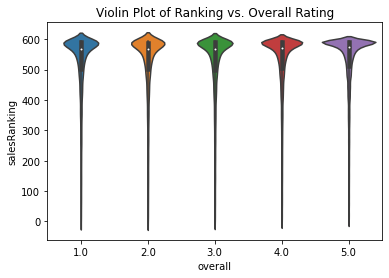

In [50]:
#Its starting to look liket there may be a relationship... Lets see the violin plot

sns.violinplot(x='overall', y = 'salesRanking', data = df)
plt.title('Violin Plot of Ranking vs. Overall Rating')
#plt.yscale('log')

<AxesSubplot:xlabel='price', ylabel='salesRanking'>

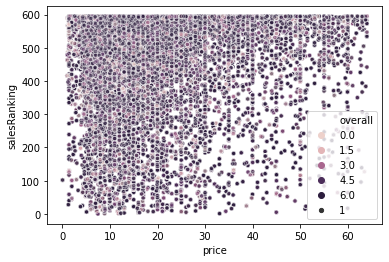

In [51]:
# Now lets take a look at price vs. Ranking
sns.scatterplot(x='price', y = 'salesRanking', data = df, size = 1, alpha = 0.5, hue = 'overall')


In [52]:
df.describe()


,overall,unixReviewTime,price,Ranking,salesRanking
count,1.001804e+06,1.001804e+06,1.001804e+06,1.001804e+06,1.001804e+06
mean,4.392786e+00,1.451739e+09,1.804872e+01,7.207354e+01,5.239265e+02
std,1.103661e+00,5.528195e+07,1.232134e+01,1.117271e+02,1.117271e+02
min,1.000000e+00,9.580896e+08,5.000000e-02,1.000000e+00,0.000000e+00
25%,4.000000e+00,1.422144e+09,8.970000e+00,5.000000e+00,5.110000e+02
50%,5.000000e+00,1.459382e+09,1.498000e+01,2.300000e+01,5.730000e+02
75%,5.000000e+00,1.490659e+09,2.300000e+01,8.500000e+01,5.910000e+02
max,5.000000e+00,1.538525e+09,6.399000e+01,5.960000e+02,5.950000e+02


In [53]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,title,brand,rank,main_cat,price,rankCat,parent,catRank,Ranking,salesRanking
0,5.0,True,"05 27, 2016",A1RCEZ4VG7W6Q4,B0000CFN85,Mary Payne Kinnamon,Quality thick paper and worked wonders for my ...,Five Stars,1464307200,"['Home & Kitchen', 'Kitchen & Dining', 'Bakewa...","Wilton 415-2505 White Standard 75 Baking Cups,...",Wilton,"['>#9,714 in Kitchen & Dining (See Top 100 in ...",Amazon Home,3.43,"[""9,714 in Kitchen & Dining (See Top 100 in Ki...",B0000CFN85,29 in Kitchen & Dining > Bakeware > Baking Too...,29.0,567.0
1,5.0,True,"08 15, 2014",A3LTJ22VDCATD1,B001BN8Z2K,Mom of 4,Covers more area in a shorter amount of time. ...,Large head cuts down your work time - twists l...,1408060800,"['Home & Kitchen', 'Vacuums & Floor Care', 'Va...",Miele SBB 400-3 Parquet Twister XL Smooth Floo...,Miele,"['>#47,359 in Home & Kitchen (See Top 100 in H...",Amazon Home,57.85,"[""47,359 in Home & Kitchen (See Top 100 in Hom...",B001BN8Z2K,38 in Home & Kitchen > Vacuums & Floor Care > ...,38.0,558.0
2,5.0,True,"12 30, 2016",A9OHV8NJ03WVH,B0026SPXRY,Susana Pachas,It's great! Easy to assemble and sturdy it's ...,It's great! Easy to assemble and sturdy it's n...,1483056000,"['Home & Kitchen', 'Furniture', 'Kitchen & Din...",Whitmor Supreme Sink Shelf - Multiuse Organize...,Whitmor,"['>#2,026 in Home & Kitchen (See Top 100 in Ho...",Amazon Home,28.93,"['2,026 in Home & Kitchen (See Top 100 in Home...",B0026SPXRY,1 in Home & Kitchen > Furniture > Kitchen & Di...,1.0,595.0
3,4.0,True,"09 28, 2015",AT3P07T5RVNTQ,B00ESAR0JW,Hstar13,We haven't had a real oven for over a year now...,"This cooks most things pretty well, but you ha...",1443398400,"['Home & Kitchen', 'Kitchen & Dining', 'Small ...",Hamilton Beach 31103A Countertop Oven with Con...,Hamilton Beach,"['>#6,672 in Kitchen & Dining (See Top 100 in ...",Amazon Home,7.05,"[""6,672 in Kitchen & Dining (See Top 100 in Ki...",B0059KY05M,73 in Kitchen & Dining > Small Appliances > Ov...,73.0,523.0
4,3.0,True,"06 23, 2017",A4I78M7IQPW12,B0074V10JS,Pamela,Nice bedskirt but won't work with a bed that h...,Nice bedskirt,1498176000,"['Home & Kitchen', 'Bedding', 'Bed Skirts']",Hdetails Bed Skirts/Elastic Ruffles - Bedding ...,Hdetails,"['>#76,184 in Home & Kitchen (See Top 100 in H...",Amazon Home,12.99,"[""76,184 in Home & Kitchen (See Top 100 in Hom...",B0074V10JS,95 in Home & Kitchen > Bedding > Bed Skirts'],95.0,501.0


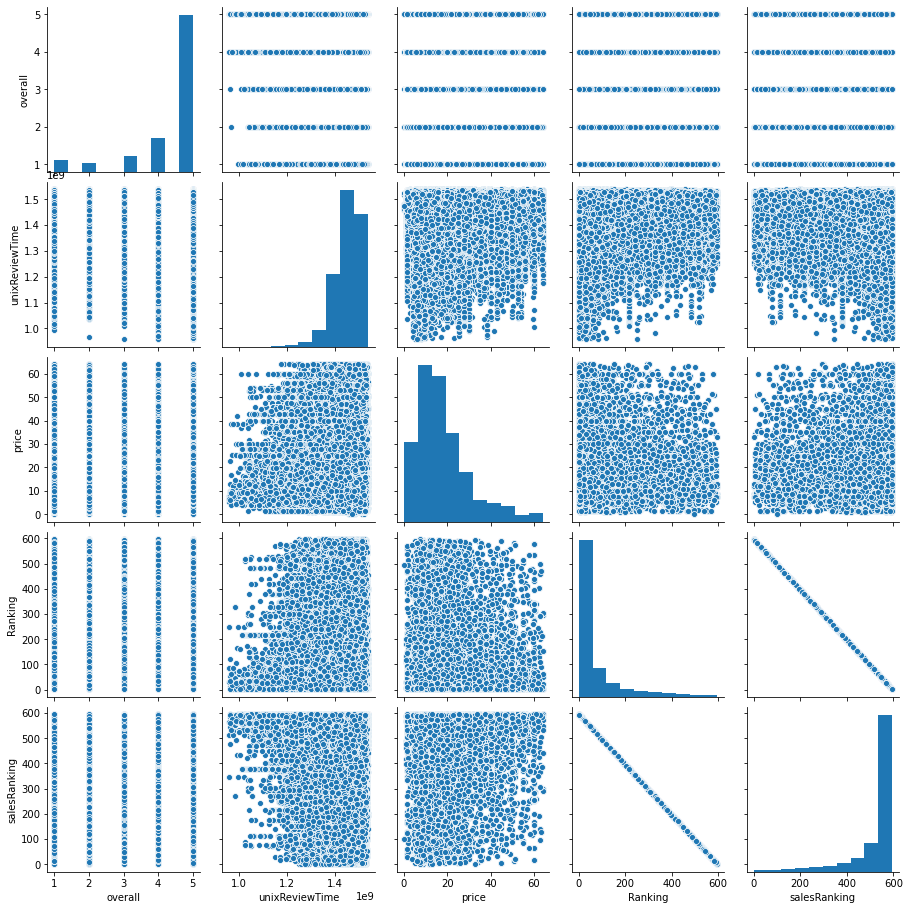

In [54]:
#Lets see a pairplot

sns.pairplot(df.drop('verified', axis = 1))

<AxesSubplot:xlabel='price', ylabel='overall'>

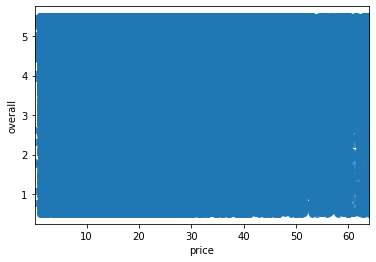

In [55]:
#I'll explore the possibility that there is a relationship between overall
sns.regplot(x = 'price', y = 'overall', data= df, y_jitter = 0.5)

I doubt there is a relationship between overall and price considering the confidence interval for the slope crosses zero.
I'll continue to look for linear relationships.

Text(0.5, 1.0, 'Ranking vs. Price')

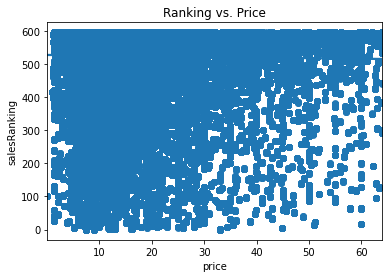

In [56]:
#There definitely appears to be a relationship between price and Ranking
sns.regplot(x = 'price', y = 'salesRanking', data= df, y_jitter = 0.9)
#plt.yscale('log')
plt.title('Ranking vs. Price')

Text(0.5, 1.0, 'Ranking vs. Overall Rating')

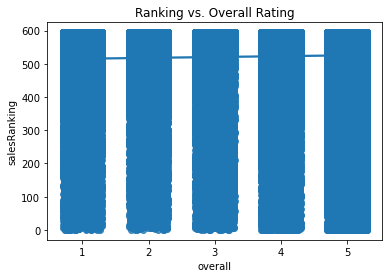

In [57]:
#There definitely appears to be a relationship between price and Ranking
sns.regplot(x = 'overall', y = 'salesRanking', data= df, x_jitter = 0.3)
plt.title('Ranking vs. Overall Rating')
#plt.yscale('log')


<AxesSubplot:xlabel='ratingPrice', ylabel='salesRanking'>

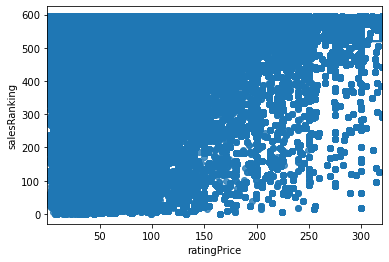

In [58]:
#Lets explore the possibility that there may be an interaction

df['ratingPrice'] = df['overall']*df['price']
sns.regplot(x = 'ratingPrice', y = 'salesRanking', data = df)

#it looks like there could be an interaction. 

In [59]:
#Save the data

df.to_csv('Data/ProcessedAmazonReviewData1500k.csv', index=False)

<AxesSubplot:>

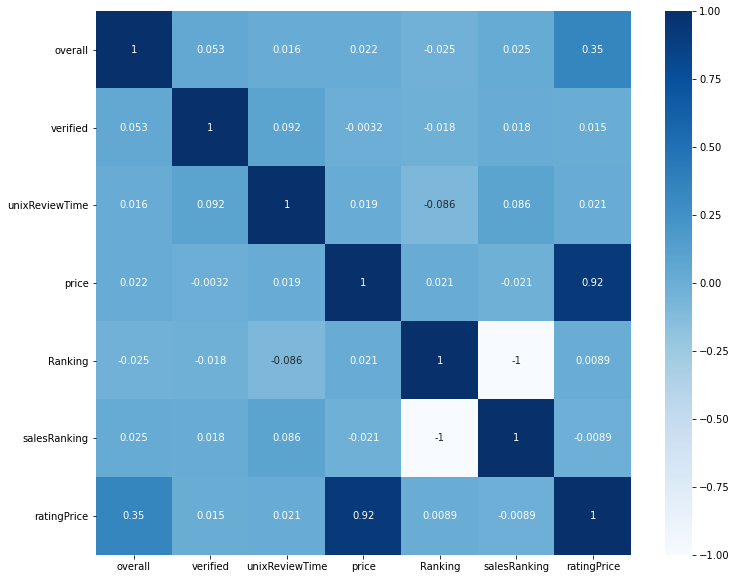

In [60]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')